<a href="https://colab.research.google.com/github/LIKHITHREDDY95/Hand_0n_6/blob/main/plotting_and_benchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

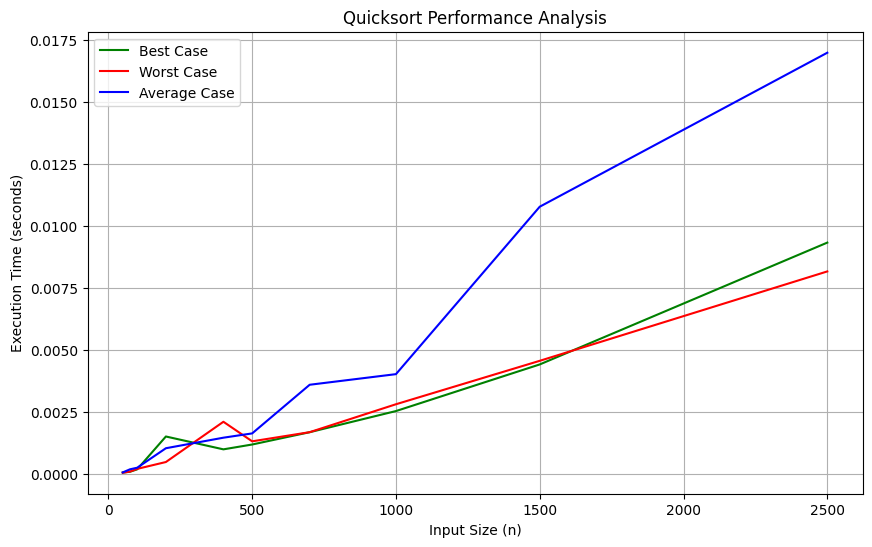

In [7]:
import random
import time
import matplotlib.pyplot as plt

def quicksort_fixed_pivot(arr, start, end):
    if start < end:
        pivot_index = partition_fixed(arr, start, end)
        quicksort_fixed_pivot(arr, start, pivot_index - 1)
        quicksort_fixed_pivot(arr, pivot_index + 1, end)


def partition_fixed(arr, start, end):
    mid = (start + end) // 2
    arr[end], arr[mid] = arr[mid], arr[end]  # Swap pivot to end
    pivot = arr[end]
    i = start - 1

    for j in range(start, end):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[end] = arr[end], arr[i + 1]
    return i + 1
def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr, 0, len(arr) - 1)
    return time.time() - start_time



def run_benchmarks(sizes):
    best_case_times = []
    worst_case_times = []
    average_case_times = []

    for size in sizes:

        sorted_arr = list(range(size))
        best_case_times.append(measure_time(quicksort_fixed_pivot, sorted_arr.copy()))


        reversed_arr = list(range(size, 0, -1))
        worst_case_times.append(measure_time(quicksort_fixed_pivot, reversed_arr.copy()))


        avg_case_times = []
        for _ in range(5):  # Repeat to get an average
            random_arr = [random.randint(1, 10000) for _ in range(size)]
            avg_case_times.append(measure_time(quicksort_fixed_pivot, random_arr.copy()))

        average_case_times.append(sum(avg_case_times) / len(avg_case_times))

    return best_case_times, worst_case_times, average_case_times
def plot_results(sizes, best_case, worst_case, average_case):
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, best_case, 'g-', label='Best Case')
    plt.plot(sizes, worst_case, 'r-', label='Worst Case')
    plt.plot(sizes, average_case, 'b-', label='Average Case')

    plt.xlabel('Input Size (n)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Quicksort Performance Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()


array_sizes = [50, 75, 100, 200, 400 , 500 , 700 , 1000 , 1500 , 2500]
best_times, worst_times, avg_times = run_benchmarks(array_sizes)
plot_results(array_sizes, best_times, worst_times, avg_times)
